In [7]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import importlib

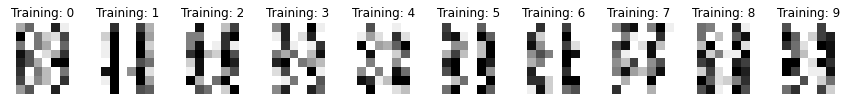

In [8]:
obfuscator = importlib.machinery.SourceFileLoader('obfuscator', './obfuscator.py').load_module()
X, y = obfuscator.get_obfuscated_dataset()
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [9]:
n_samples = len(X)
print(f"A total of {n_samples} images are in this dataset")

A total of 1797 images are in this dataset


In [10]:
from sklearn.ensemble import GradientBoostingClassifier as gbc

data = X.reshape((n_samples, -1))

clf = gbc()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.5)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
print(predicted)

[9 7 1 1 1 1 2 5 1 9 1 8 8 6 2 5 7 1 3 0 3 9 7 1 8 3 4 3 9 7 7 9 6 6 2 8 1
 8 2 8 3 2 3 2 6 2 1 2 2 5 7 7 1 8 1 8 0 0 9 5 5 7 0 0 8 9 2 7 5 0 8 6 7 1
 5 3 5 3 0 7 5 6 2 8 1 0 1 9 8 7 6 5 4 9 0 5 5 9 6 6 6 2 1 9 3 1 2 9 0 3 2
 5 6 1 7 2 2 1 4 9 2 2 7 3 1 3 3 9 5 9 8 9 2 9 5 1 5 9 1 2 9 4 3 3 7 6 8 2
 0 2 8 1 6 0 9 1 2 3 6 8 3 9 7 5 4 3 5 5 8 3 0 4 2 6 3 6 0 7 8 4 2 7 8 8 0
 8 7 3 1 4 1 4 5 7 2 2 6 7 4 6 3 3 7 7 7 7 0 0 0 6 3 8 3 1 1 4 9 4 3 8 6 6
 9 3 5 9 4 3 6 8 1 8 4 4 6 3 5 1 4 3 0 0 6 5 7 0 0 1 4 9 9 9 6 1 5 0 6 7 8
 7 7 5 0 7 8 3 3 7 4 3 3 7 0 0 8 1 6 9 6 5 7 7 0 9 2 5 7 5 1 5 0 5 4 2 7 0
 0 9 1 6 0 5 4 1 8 1 6 7 0 3 7 3 6 7 5 5 9 5 8 5 9 5 2 3 2 5 6 2 2 0 5 8 8
 7 0 9 6 5 0 7 1 1 0 8 1 2 2 6 3 8 2 6 9 5 9 6 4 8 8 4 3 7 7 9 5 3 3 0 6 4
 9 6 4 8 3 8 5 6 7 9 3 0 7 9 1 1 2 1 5 9 5 2 5 1 8 1 8 1 5 4 5 9 4 8 9 8 9
 7 0 9 4 1 2 3 5 6 0 8 8 4 4 6 9 8 0 9 4 7 9 6 4 8 7 6 1 2 8 4 4 6 1 0 3 2
 0 4 3 0 3 9 5 5 5 6 1 2 4 2 8 4 9 9 7 0 5 9 7 8 5 1 1 8 7 9 9 5 2 2 1 6 6
 3 0 0 2 7 5 8 8 1 1 6 2 

In [11]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       0.95      0.97      0.96        94
           2       0.99      0.98      0.98        97
           3       0.95      0.99      0.97        83
           4       0.98      0.98      0.98        86
           5       1.00      0.92      0.96        99
           6       0.99      0.99      0.99        87
           7       0.98      0.97      0.97        91
           8       0.93      0.93      0.93        88
           9       0.92      0.97      0.94        94

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[79  0  0  0  0  0  0  0  1  0]
 [ 1 91  0  1  0  0  0  0  1  0]
 [ 0  1 95  0  0  0  0  1  0  0]
 [ 0  0  1 82  0  0  0  0  0  0]
 [ 0  1  0  0 84  0  1  0  0  0]
 [ 0  0  0  1  1 91  0  0  2  4]
 [ 0  0  0  0  0  0 86  0  1  0]
 [ 0  0  0  1  0  0  0 88  1  1]
 [ 0  2  0  0  1  0  0  0 82  3]
 [ 0  1  0  1  0  0  0  1  0 91]]


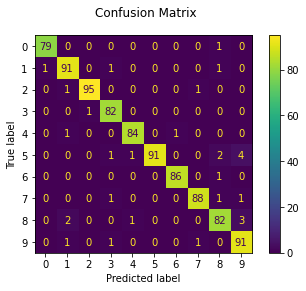

In [12]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()